#**Telecom X - Análisis de Evasión de Clientes**


#### **Challenge de la Formación: Aprendiendo a hacer ETL G8-ONE**
##### **Heriberto Turpo Quiro**

## **📌 Extracción(E - Extract)**

### **Extracción de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches # Importar para leyenda manual

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## **🔧 Transformación (T - Transform)**

### **Conoce el conjunto de datos**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### **Normalización de las columnas anidadas**


In [4]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [5]:
# Columnas a normalizar (estas contienen datos anidados tipo dict o JSON)
columnas_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Creamos una copia del DataFrame original sin las columnas anidadas
df_base = df.drop(columns=columnas_a_normalizar)

# Lista para guardar los DataFrames normalizados
dfs_normalizados = []

for col in columnas_a_normalizar:
  df_normalizado = pd.json_normalize(df[col])
  df_normalizado.columns = [f"{col}_{subcol}" for subcol in df_normalizado.columns]

  # Agrega a la lista de normalizados
  dfs_normalizados.append(df_normalizado)

# Concatenar todo en un solo DataFrame
df_telecom = pd.concat([df_base] + dfs_normalizados, axis=1)

In [6]:
df_telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### **Estandarización y transformación de datos**

In [7]:
df_telecom.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

In [8]:
#renombrar nombre de columnas
nuevos_nombres_columnas = {
    'customerID': 'id_cliente',
    'Churn': 'abandono_cliente',
    'customer_gender': 'genero',
    'customer_SeniorCitizen': 'es_adulto_mayor',
    'customer_Partner': 'tiene_pareja',
    'customer_Dependents': 'tiene_dependientes',
    'customer_tenure': 'meses_de_antiguedad',
    'phone_PhoneService': 'tiene_servicio_telefonico',
    'phone_MultipleLines': 'tiene_lineas_multiples',
    'internet_InternetService': 'tipo_servicio_internet',
    'internet_OnlineSecurity': 'tiene_seguridad_en_linea',
    'internet_OnlineBackup': 'tiene_respaldo_en_linea',
    'internet_DeviceProtection': 'tiene_proteccion_dispositivo',
    'internet_TechSupport': 'tiene_soporte_tecnico',
    'internet_StreamingTV': 'tiene_tv_streaming',
    'internet_StreamingMovies': 'tiene_peliculas_streaming',
    'account_Contract': 'tipo_contrato',
    'account_PaperlessBilling': 'usa_factura_electronica',
    'account_PaymentMethod': 'metodo_de_pago',
    'account_Charges.Monthly': 'cargo_mensual',
    'account_Charges.Total': 'cargo_total'
}

# Renombrar las columnas
df_telecom = df_telecom.rename(columns=nuevos_nombres_columnas)
print(df_telecom.columns)
df_telecom.sample(5)

Index(['id_cliente', 'abandono_cliente', 'genero', 'es_adulto_mayor',
       'tiene_pareja', 'tiene_dependientes', 'meses_de_antiguedad',
       'tiene_servicio_telefonico', 'tiene_lineas_multiples',
       'tipo_servicio_internet', 'tiene_seguridad_en_linea',
       'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_tv_streaming',
       'tiene_peliculas_streaming', 'tipo_contrato', 'usa_factura_electronica',
       'metodo_de_pago', 'cargo_mensual', 'cargo_total'],
      dtype='object')


,id_cliente,abandono_cliente,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_de_antiguedad,tiene_servicio_telefonico,tiene_lineas_multiples,tipo_servicio_internet,...,tiene_respaldo_en_linea,tiene_proteccion_dispositivo,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,usa_factura_electronica,metodo_de_pago,cargo_mensual,cargo_total
5546,7596-IIWYC,No,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.25,538.2
7169,9853-JFZDU,No,Female,0,Yes,No,35,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.85,1861.1
3314,4622-YNKIJ,No,Male,0,No,No,33,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Two year,Yes,Electronic check,88.95,3027.65
2480,3460-TJBWI,No,Male,0,Yes,Yes,24,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.20,609.05
1741,2475-MROZF,No,Male,0,No,No,30,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),95.00,2852.4


### Comprobación de incoherencias en los datos

In [9]:
#verificación de valores duplicados
print(df_telecom.duplicated().sum())

0


In [10]:
#verificando errores de formato
for col in ['id_cliente', 'abandono_cliente', 'genero', 'es_adulto_mayor',
       'tiene_pareja', 'tiene_dependientes', 'meses_de_antiguedad',
       'tiene_servicio_telefonico', 'tiene_lineas_multiples',
       'tipo_servicio_internet', 'tiene_seguridad_en_linea',
       'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_tv_streaming',
       'tiene_peliculas_streaming', 'tipo_contrato', 'usa_factura_electronica',
       'metodo_de_pago', 'cargo_mensual', 'cargo_total']:
    print(f"Valores únicos para la columna '{col}':")
    print(df_telecom[col].unique())
    print("-" * 40)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Valores únicos para la columna 'abandono_cliente':
['No' 'Yes' '']
----------------------------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
----------------------------------------
Valores únicos para la columna 'es_adulto_mayor':
[0 1]
----------------------------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
----------------------------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
----------------------------------------
Valores únicos para la columna 'meses_de_antiguedad':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------

In [11]:
# Verificación de valores nulos en todo el DataFrame
df_telecom.isnull().sum()

,0
id_cliente,0
abandono_cliente,0
genero,0
es_adulto_mayor,0
tiene_pareja,0
tiene_dependientes,0
meses_de_antiguedad,0
tiene_servicio_telefonico,0
tiene_lineas_multiples,0
tipo_servicio_internet,0


In [12]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7267 non-null   object 
 1   abandono_cliente              7267 non-null   object 
 2   genero                        7267 non-null   object 
 3   es_adulto_mayor               7267 non-null   int64  
 4   tiene_pareja                  7267 non-null   object 
 5   tiene_dependientes            7267 non-null   object 
 6   meses_de_antiguedad           7267 non-null   int64  
 7   tiene_servicio_telefonico     7267 non-null   object 
 8   tiene_lineas_multiples        7267 non-null   object 
 9   tipo_servicio_internet        7267 non-null   object 
 10  tiene_seguridad_en_linea      7267 non-null   object 
 11  tiene_respaldo_en_linea       7267 non-null   object 
 12  tiene_proteccion_dispositivo  7267 non-null   object 
 13  tie

In [13]:
df_telecom.dtypes

,0
id_cliente,object
abandono_cliente,object
genero,object
es_adulto_mayor,int64
tiene_pareja,object
tiene_dependientes,object
meses_de_antiguedad,int64
tiene_servicio_telefonico,object
tiene_lineas_multiples,object
tipo_servicio_internet,object


### **Manejo de inconsistencias**

In [14]:
df_telecom["es_adulto_mayor"]= df_telecom["es_adulto_mayor"].map({0: "No", 1: "Sí"})
df_telecom.head()

,id_cliente,abandono_cliente,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_de_antiguedad,tiene_servicio_telefonico,tiene_lineas_multiples,tipo_servicio_internet,...,tiene_respaldo_en_linea,tiene_proteccion_dispositivo,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,usa_factura_electronica,metodo_de_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
# Manejo de valores nulos y conversión de tipo para 'abandono_cliente' y 'cargos_total' ---
# Limpiar la columna 'abandono_cliente': Convertir cadenas vacías a NaN y eliminar las filas correspondientes
df_telecom['abandono_cliente'].replace('', np.nan, inplace=True)
df_telecom.dropna(subset=['abandono_cliente'], inplace=True)

/tmp/ipython-input-3939468476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_telecom['abandono_cliente'].replace('', np.nan, inplace=True)


In [16]:
print(f"\nNúmero de filas después de eliminar nulos en 'evasion': {len(df_telecom)}")


Número de filas después de eliminar nulos en 'evasion': 7043


In [17]:
print("\nConteo de valores nulos por columna después de eliminar filas con NA en 'evasion':")
print(df_telecom.isnull().sum())


Conteo de valores nulos por columna después de eliminar filas con NA en 'evasion':
id_cliente                      0
abandono_cliente                0
genero                          0
es_adulto_mayor                 0
tiene_pareja                    0
tiene_dependientes              0
meses_de_antiguedad             0
tiene_servicio_telefonico       0
tiene_lineas_multiples          0
tipo_servicio_internet          0
tiene_seguridad_en_linea        0
tiene_respaldo_en_linea         0
tiene_proteccion_dispositivo    0
tiene_soporte_tecnico           0
tiene_tv_streaming              0
tiene_peliculas_streaming       0
tipo_contrato                   0
usa_factura_electronica         0
metodo_de_pago                  0
cargo_mensual                   0
cargo_total                     0
dtype: int64


In [18]:
# Conversión y Limpieza de 'cargo_total'
# Convertir 'cargos_totales' a numérico, manejando errores
df_telecom['cargo_total'] = pd.to_numeric(df_telecom['cargo_total'], errors='coerce')

In [19]:
# Verificar los valores nulos creados por la coerción
print("\nConteo de valores nulos después de convertir 'cargo_total' a numérico:")
print(df_telecom.isnull().sum())


Conteo de valores nulos después de convertir 'cargo_total' a numérico:
id_cliente                       0
abandono_cliente                 0
genero                           0
es_adulto_mayor                  0
tiene_pareja                     0
tiene_dependientes               0
meses_de_antiguedad              0
tiene_servicio_telefonico        0
tiene_lineas_multiples           0
tipo_servicio_internet           0
tiene_seguridad_en_linea         0
tiene_respaldo_en_linea          0
tiene_proteccion_dispositivo     0
tiene_soporte_tecnico            0
tiene_tv_streaming               0
tiene_peliculas_streaming        0
tipo_contrato                    0
usa_factura_electronica          0
metodo_de_pago                   0
cargo_mensual                    0
cargo_total                     11
dtype: int64


In [20]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   abandono_cliente              7043 non-null   object 
 2   genero                        7043 non-null   object 
 3   es_adulto_mayor               7043 non-null   object 
 4   tiene_pareja                  7043 non-null   object 
 5   tiene_dependientes            7043 non-null   object 
 6   meses_de_antiguedad           7043 non-null   int64  
 7   tiene_servicio_telefonico     7043 non-null   object 
 8   tiene_lineas_multiples        7043 non-null   object 
 9   tipo_servicio_internet        7043 non-null   object 
 10  tiene_seguridad_en_linea      7043 non-null   object 
 11  tiene_respaldo_en_linea       7043 non-null   object 
 12  tiene_proteccion_dispositivo  7043 non-null   object 
 13  tiene_so

In [21]:
# Mostrar el porcentaje de nulos para 'cargo_total'
print("\nPorcentaje de valores nulos para 'cargo_total':")
df_telecom['cargo_total'].isnull().sum() / len(df_telecom) * 100


Porcentaje de valores nulos para 'cargo_total':


np.float64(0.1561834445548772)

In [22]:
# Inspeccionar las filas donde 'cargo_total' es NaN (si existen)
# Esto es crucial para entender por qué se convirtieron a NaN. En tu caso, ¡esperamos 0!
print("\nFilas donde 'cargo_total' es NaN (esperado 0):")
df_telecom[df_telecom['cargo_total'].isnull()].head()


Filas donde 'cargo_total' es NaN (esperado 0):


,id_cliente,abandono_cliente,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_de_antiguedad,tiene_servicio_telefonico,tiene_lineas_multiples,tipo_servicio_internet,...,tiene_respaldo_en_linea,tiene_proteccion_dispositivo,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,usa_factura_electronica,metodo_de_pago,cargo_mensual,cargo_total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN


In [23]:
# Es importante ver las columnas relevantes para entender el patrón
df_telecom[df_telecom['cargo_total'].isnull()][['id_cliente', 'meses_de_antiguedad', 'cargo_mensual', 'cargo_total']]

,id_cliente,meses_de_antiguedad,cargo_mensual,cargo_total
975,1371-DWPAZ,0,56.05,NaN
1775,2520-SGTTA,0,20.00,NaN
1955,2775-SEFEE,0,61.90,NaN
2075,2923-ARZLG,0,19.70,NaN
2232,3115-CZMZD,0,20.25,NaN
2308,3213-VVOLG,0,25.35,NaN
2930,4075-WKNIU,0,73.35,NaN
3134,4367-NUYAO,0,25.75,NaN
3203,4472-LVYGI,0,52.55,NaN
4169,5709-LVOEQ,0,80.85,NaN


In [24]:
# Imputar los valores NaN en 'cargo_total' con 0
df_telecom['cargo_total'] = df_telecom['cargo_total'].fillna(0)

In [25]:
print(df_telecom['cargo_total'].isnull().sum())

0


In [26]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   abandono_cliente              7043 non-null   object 
 2   genero                        7043 non-null   object 
 3   es_adulto_mayor               7043 non-null   object 
 4   tiene_pareja                  7043 non-null   object 
 5   tiene_dependientes            7043 non-null   object 
 6   meses_de_antiguedad           7043 non-null   int64  
 7   tiene_servicio_telefonico     7043 non-null   object 
 8   tiene_lineas_multiples        7043 non-null   object 
 9   tipo_servicio_internet        7043 non-null   object 
 10  tiene_seguridad_en_linea      7043 non-null   object 
 11  tiene_respaldo_en_linea       7043 non-null   object 
 12  tiene_proteccion_dispositivo  7043 non-null   object 
 13  tiene_so

In [27]:
# Primeras 5 filas con 'antiguedad' 0 y 'cargo_total' 0 (para verificar):
df_telecom[(df_telecom['meses_de_antiguedad'] == 0) & (df_telecom['cargo_total'] == 0)].head()

,id_cliente,abandono_cliente,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_de_antiguedad,tiene_servicio_telefonico,tiene_lineas_multiples,tipo_servicio_internet,...,tiene_respaldo_en_linea,tiene_proteccion_dispositivo,tiene_soporte_tecnico,tiene_tv_streaming,tiene_peliculas_streaming,tipo_contrato,usa_factura_electronica,metodo_de_pago,cargo_mensual,cargo_total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0


In [28]:
#verificando errores de formato
for col in ['id_cliente', 'abandono_cliente', 'genero', 'es_adulto_mayor',
       'tiene_pareja', 'tiene_dependientes', 'meses_de_antiguedad',
       'tiene_servicio_telefonico', 'tiene_lineas_multiples',
       'tipo_servicio_internet', 'tiene_seguridad_en_linea',
       'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_tv_streaming',
       'tiene_peliculas_streaming', 'tipo_contrato', 'usa_factura_electronica',
       'metodo_de_pago', 'cargo_mensual', 'cargo_total']:
    print(f"Valores únicos para la columna '{col}':")
    print(df_telecom[col].unique())
    print("-" * 40)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Valores únicos para la columna 'abandono_cliente':
['No' 'Yes']
----------------------------------------
Valores únicos para la columna 'genero':
['Female' 'Male']
----------------------------------------
Valores únicos para la columna 'es_adulto_mayor':
['No' 'Sí']
----------------------------------------
Valores únicos para la columna 'tiene_pareja':
['Yes' 'No']
----------------------------------------
Valores únicos para la columna 'tiene_dependientes':
['Yes' 'No']
----------------------------------------
Valores únicos para la columna 'meses_de_antiguedad':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
-----------------------------------

In [29]:
#Traducir los valores de todas las variables binarias (Yes / No) al español para mantener consistencia.
# Lista de columnas binarias
columnas_binarias = [
    'abandono_cliente', 'tiene_pareja', 'tiene_dependientes',
    'tiene_servicio_telefonico', 'usa_factura_electronica'
]

# Reemplazo en todas las columnas
df_telecom[columnas_binarias] = df_telecom[columnas_binarias].replace({
    'Yes': 'Sí',
    'No': 'No'
})

# Traducir género (aunque tiene 2 valores, se mantiene por ser relevante para análisis descriptivo)
df_telecom['genero'] = df_telecom['genero'].replace({
    'Female': 'Femenino',
    'Male': 'Masculino'
})

# Traducir tiene_lineas_multiples (3 valores)
df_telecom['tiene_lineas_multiples'] = df_telecom['tiene_lineas_multiples'].replace({
    'Yes': 'Sí',
    'No': 'No',
    'No phone service': 'Sin servicio telefónico'
})

# Traducir tipo_servicio_internet (3 valores)
df_telecom['tipo_servicio_internet'] = df_telecom['tipo_servicio_internet'].replace({
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sin internet'
})



# Columnas con valores 'Yes', 'No', 'No internet service'
cols_con_no_internet = [
    'tiene_seguridad_en_linea',
    'tiene_respaldo_en_linea',
    'tiene_proteccion_dispositivo',
    'tiene_soporte_tecnico',
    'tiene_tv_streaming',
    'tiene_peliculas_streaming'
]

# Reemplazo común para todas esas columnas
for col in cols_con_no_internet:
    df_telecom[col] = df_telecom[col].replace({
        'Yes': 'Sí',
        'No': 'No',
        'No internet service': 'Sin internet'
    })



# Traducir tipo_contrato (3 valores)
df_telecom['tipo_contrato'] = df_telecom['tipo_contrato'].replace({
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
})

# Traducir metodo_de_pago (4 valores)
df_telecom['metodo_de_pago'] = df_telecom['metodo_de_pago'].replace({
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automático)'
})



In [30]:
# Creando la columna 'cargo_diario'
df_telecom['cargo_diario'] = df_telecom['cargo_mensual']/30

In [31]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   abandono_cliente              7043 non-null   object 
 2   genero                        7043 non-null   object 
 3   es_adulto_mayor               7043 non-null   object 
 4   tiene_pareja                  7043 non-null   object 
 5   tiene_dependientes            7043 non-null   object 
 6   meses_de_antiguedad           7043 non-null   int64  
 7   tiene_servicio_telefonico     7043 non-null   object 
 8   tiene_lineas_multiples        7043 non-null   object 
 9   tipo_servicio_internet        7043 non-null   object 
 10  tiene_seguridad_en_linea      7043 non-null   object 
 11  tiene_respaldo_en_linea       7043 non-null   object 
 12  tiene_proteccion_dispositivo  7043 non-null   object 
 13  tiene_so

In [32]:
#verificando errores de formato
for col in ['id_cliente', 'abandono_cliente', 'genero', 'es_adulto_mayor',
       'tiene_pareja', 'tiene_dependientes', 'meses_de_antiguedad',
       'tiene_servicio_telefonico', 'tiene_lineas_multiples',
       'tipo_servicio_internet', 'tiene_seguridad_en_linea',
       'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
       'tiene_soporte_tecnico', 'tiene_tv_streaming',
       'tiene_peliculas_streaming', 'tipo_contrato', 'usa_factura_electronica',
       'metodo_de_pago', 'cargo_mensual', 'cargo_total','cargo_diario']:
    print(f"Valores únicos para la columna '{col}':")
    print(df_telecom[col].unique())
    print("-" * 40)

Valores únicos para la columna 'id_cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------
Valores únicos para la columna 'abandono_cliente':
['No' 'Sí']
----------------------------------------
Valores únicos para la columna 'genero':
['Femenino' 'Masculino']
----------------------------------------
Valores únicos para la columna 'es_adulto_mayor':
['No' 'Sí']
----------------------------------------
Valores únicos para la columna 'tiene_pareja':
['Sí' 'No']
----------------------------------------
Valores únicos para la columna 'tiene_dependientes':
['Sí' 'No']
----------------------------------------
Valores únicos para la columna 'meses_de_antiguedad':
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
-------------------------------

## **📊 Carga y análisis(L - Load & Analysis)**

### **Análisis Descriptivo**

 #### **1. Variables Numéricas**

In [33]:
# Seleccionamos las variables numéricas
variables_numericas = ['meses_de_antiguedad', 'cargo_mensual', 'cargo_total', 'cargo_diario']

# Análisis descriptivo
df_telecom[variables_numericas].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
meses_de_antiguedad,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
cargo_mensual,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
cargo_total,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80
cargo_diario,7043.0,2.16,1.00,0.61,1.18,2.34,2.99,3.96


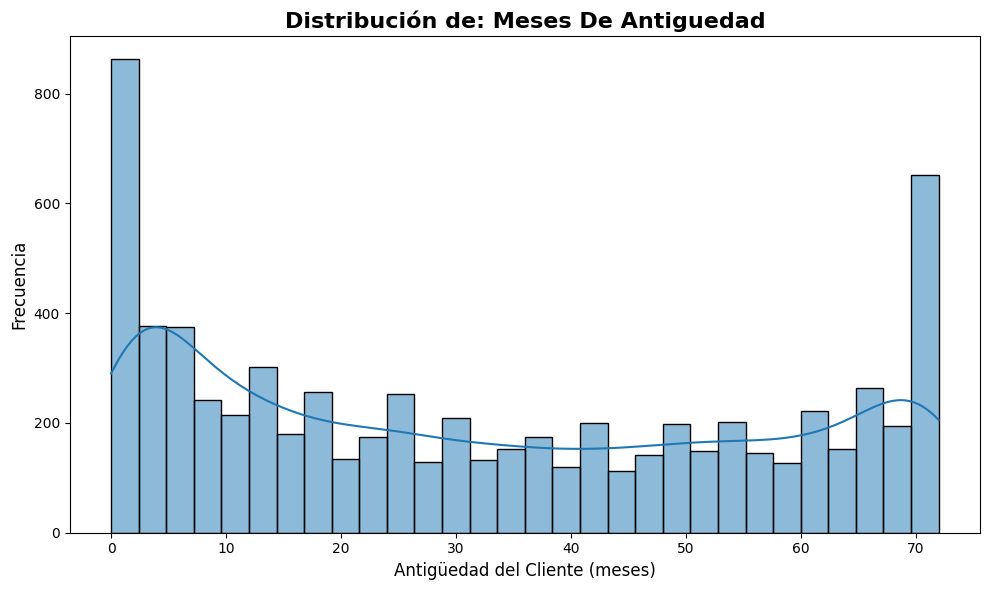

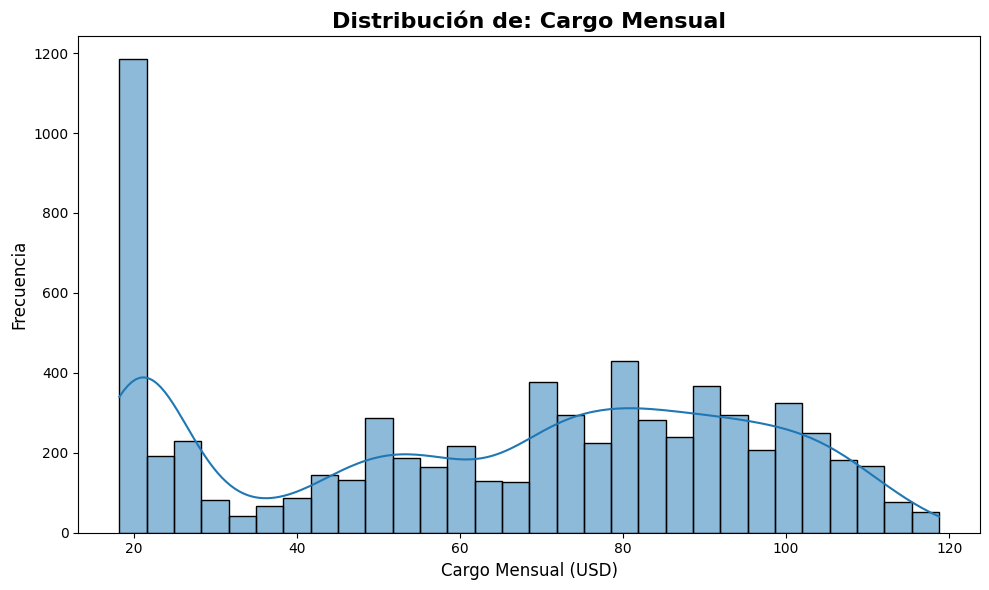

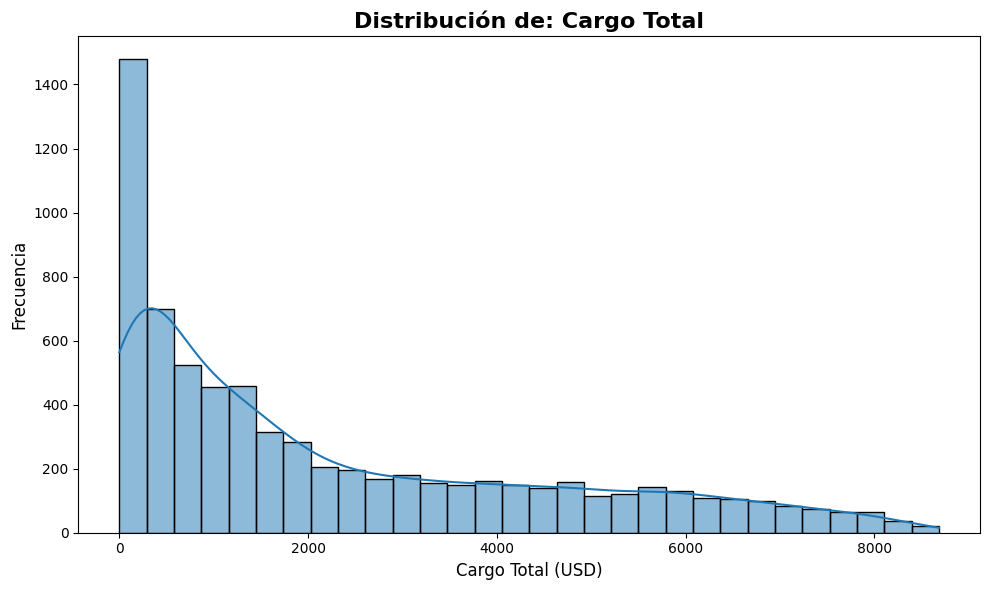

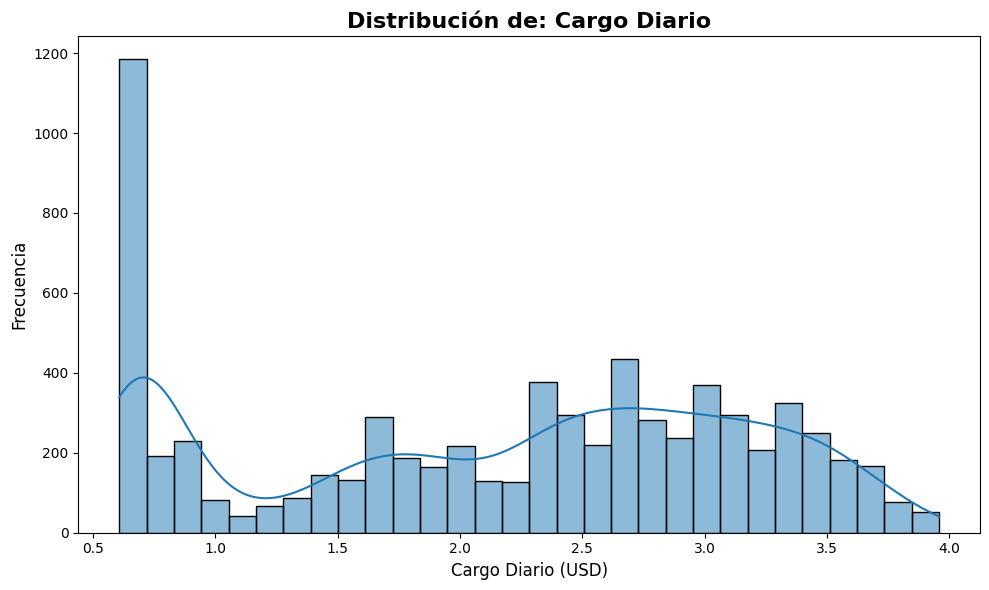

In [34]:
for col in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_telecom, x=col, kde=True, bins=30)
    # Nombre del Título
    titulo_grafico = col.replace('_', ' ').title()
    plt.title(f'Distribución de: {titulo_grafico}', fontsize=16, fontweight='bold')
    # --- Actualización para la etiqueta del eje X ---
    if col == 'meses_de_antiguedad':
        etiqueta_x = 'Antigüedad del Cliente (meses)'
    elif col == 'cargo_mensual':
        etiqueta_x = 'Cargo Mensual (USD)'
    elif col == 'cargo_total':
        etiqueta_x = 'Cargo Total (USD)'
    elif col == 'cargo_diario':  # Nuevo caso para 'cargo_diario'
        etiqueta_x = 'Cargo Diario (USD)'
    else:
        # Si no es ninguna de las anteriores, usamos el nombre de la columna mejorado
        etiqueta_x = titulo_grafico

    plt.xlabel(etiqueta_x, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.tight_layout()
    # Creamos un nombre de archivo dinámico para cada variable
    nombre_archivo = f'distribucion_{col}.png'
    # Guardamos el gráfico en alta resolución
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()


#### **2. Variables Categóricas**

**Variables Categóricas**


Podemos observar que nuestro conjunto de datos contiene una gran cantidad de variables categóricas, así que comencemos examinando su comportamiento:

**Género:** La distribución por género está bien equilibrada, con casi el mismo número de clientes hombres y mujeres.

**Ciudadano Senior:** El 84 % de nuestros clientes no son considerados ciudadanos mayores, aunque el 16 % sí entra en esta categoría.

**Pareja:** Nuestra base de clientes está dividida de manera uniforme: aproximadamente el 50 % tiene pareja y el otro 50 % está soltero.

**Dependientes:** El 70 % de los clientes no tiene personas a su cargo (dependientes).

**Servicio Telefónico:** Un punto clave es que el 90 % de nuestros clientes está suscrito a servicios telefónicos.

**Líneas Múltiples:** El dato más destacado aquí es que el 42 % de los clientes tiene más de una línea telefónica.

**Servicio de Internet:** El 78 % de los clientes tiene una suscripción a internet.

**Seguridad en línea, Respaldo, Protección de dispositivos, Soporte técnico:** Entre los clientes con servicio de internet, alrededor del 55 % no está suscrito a estos servicios adicionales, en promedio.

**Streaming de TV y Películas:** Aproximadamente el 50 % de los usuarios de internet también utiliza servicios de streaming.

**Contrato:** El 55 % de nuestros clientes tiene contratos mes a mes.

**Factura sin papel:** El 60 % de los clientes no opta por facturación en papel.

**Método de pago:** Los métodos de pago están bastante equilibrados entre las cuatro categorías, aunque los cheques electrónicos tienen una ligera ventaja en su uso.

**Evasión (Churn):** La variable objetivo está desbalanceada, con significativamente más respuestas “No” que “Sí”. Solo el 26.5 % de los clientes ha cancelado el servicio, lo cual es el resultado clave que queremos predecir.



In [35]:
# Selección automática de columnas categóricas (objetos)
variables_categoricas = df_telecom.select_dtypes(include='object').columns.drop('id_cliente')

# Análisis de frecuencia absoluta y relativa
for col in variables_categoricas:
    print(f"\n--- {col} ---")
    print(df_telecom[col].value_counts())
    print("\n% porcentajes:")
    print((df_telecom[col].value_counts(normalize=True) * 100).round(2))



--- abandono_cliente ---
abandono_cliente
No    5174
Sí    1869
Name: count, dtype: int64

% porcentajes:
abandono_cliente
No    73.46
Sí    26.54
Name: proportion, dtype: float64

--- genero ---
genero
Masculino    3555
Femenino     3488
Name: count, dtype: int64

% porcentajes:
genero
Masculino    50.48
Femenino     49.52
Name: proportion, dtype: float64

--- es_adulto_mayor ---
es_adulto_mayor
No    5901
Sí    1142
Name: count, dtype: int64

% porcentajes:
es_adulto_mayor
No    83.79
Sí    16.21
Name: proportion, dtype: float64

--- tiene_pareja ---
tiene_pareja
No    3641
Sí    3402
Name: count, dtype: int64

% porcentajes:
tiene_pareja
No    51.7
Sí    48.3
Name: proportion, dtype: float64

--- tiene_dependientes ---
tiene_dependientes
No    4933
Sí    2110
Name: count, dtype: int64

% porcentajes:
tiene_dependientes
No    70.04
Sí    29.96
Name: proportion, dtype: float64

--- tiene_servicio_telefonico ---
tiene_servicio_telefonico
Sí    6361
No     682
Name: count, dtype: int64

### **Distribución de evasión**

In [36]:
# Estilo general
sns.set_theme(style="white")
plt.rcParams.update({'font.size': 12})

#### **1. Conteo Absoluto de Evasión**

/tmp/ipython-input-468319932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_telecom, x='abandono_cliente', palette='Set2')


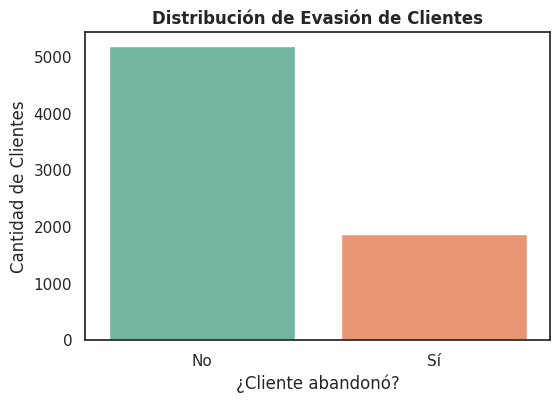

In [37]:

custom_palette = {'No': "#00CC96", 'Sí': "#FFA15A"}

plt.figure(figsize=(6, 4))
sns.countplot(data=df_telecom, x='abandono_cliente', palette='Set2')
plt.title('Distribución de Evasión de Clientes',fontweight='bold')
plt.xlabel('¿Cliente abandonó?')
plt.ylabel('Cantidad de Clientes')
plt.savefig('distribucion_clientes_abandonaron.png', dpi=300)
plt.show()

#### **2. Porcentaje de Clientes que Abandonaron**

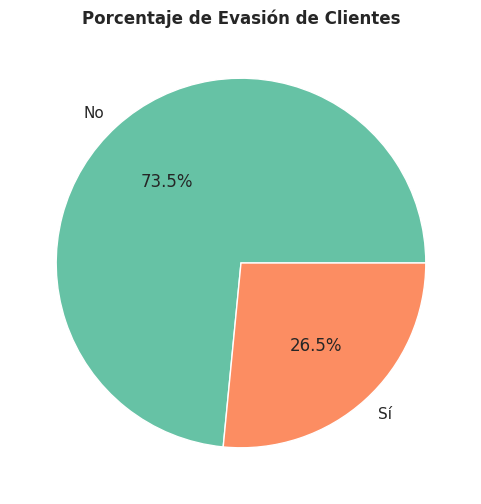

In [38]:
# Porcentaje de cada categoría
porcentaje = df_telecom['abandono_cliente'].value_counts(normalize=True) * 100

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(porcentaje, labels=porcentaje.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Porcentaje de Evasión de Clientes',fontweight='bold')
plt.savefig('porcentaje_clientes_abandonaron.png', dpi=300)
plt.show()


#### **3. Tabla de frecuencias:**

In [39]:
df_telecom['abandono_cliente'].value_counts()
df_telecom['abandono_cliente'].value_counts(normalize=True).round(3)

,proportion
abandono_cliente,
No,0.735
Sí,0.265


In [40]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   abandono_cliente              7043 non-null   object 
 2   genero                        7043 non-null   object 
 3   es_adulto_mayor               7043 non-null   object 
 4   tiene_pareja                  7043 non-null   object 
 5   tiene_dependientes            7043 non-null   object 
 6   meses_de_antiguedad           7043 non-null   int64  
 7   tiene_servicio_telefonico     7043 non-null   object 
 8   tiene_lineas_multiples        7043 non-null   object 
 9   tipo_servicio_internet        7043 non-null   object 
 10  tiene_seguridad_en_linea      7043 non-null   object 
 11  tiene_respaldo_en_linea       7043 non-null   object 
 12  tiene_proteccion_dispositivo  7043 non-null   object 
 13  tiene_so

### **Recuento de evasión por variables categóricas**

In [41]:
# Selecciona variables categóricas
categoricas = ['genero', 'es_adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'tiene_servicio_telefonico', 'tiene_lineas_multiples',
               'tipo_servicio_internet', 'tiene_seguridad_en_linea', 'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
               'tiene_soporte_tecnico', 'tiene_tv_streaming', 'tiene_peliculas_streaming', 'tipo_contrato', 'usa_factura_electronica',
               'metodo_de_pago']

In [42]:
# Análisis Detallado de Abandono por Variables Categóricas
factores_compromiso_cliente  = ['tipo_contrato', 'usa_factura_electronica', 'metodo_de_pago']
factores_servicio_producto = ['tipo_servicio_internet', 'tiene_seguridad_en_linea', 'tiene_respaldo_en_linea', 'tiene_proteccion_dispositivo',
                              'tiene_soporte_tecnico', 'tiene_tv_streaming', 'tiene_peliculas_streaming']
factores_demograficos_estilo_vida = ['genero', 'es_adulto_mayor', 'tiene_pareja', 'tiene_dependientes']


In [43]:
# Diccionario de abreviaciones
etiquetas_abreviadas = {
    'Cheque electrónico': 'Cheque e-',
    'Cheque por correo': 'Cheque correo',
    'Transferencia bancaria (automático)': 'Transf. bancaria',
    'Tarjeta de crédito (automático)': 'Tarj. crédito'
}

def generar_grafico_abandono(df, variable, ax, titulo_principal=None):
    """
    Genera un gráfico de barras de evasión de clientes para una variable categórica.

    Args:
        df (pd.DataFrame): El DataFrame de datos.
        variable (str): El nombre de la columna a graficar.
        ax (matplotlib.axes.Axes): El objeto de eje de matplotlib donde dibujar.
        titulo_principal (str, opcional): El título principal del gráfico.
    """
    # Manejar las abreviaciones si la variable es 'metodo_de_pago'
    if variable == 'metodo_de_pago':
        # Crear una copia de la columna para no modificar el DataFrame original
        temp_variable = df['metodo_de_pago'].replace(etiquetas_abreviadas)
        nombre_columna = 'metodo_de_pago_abrev'
        df = df.copy() # Trabajar con una copia para evitar SettingWithCopyWarning
        df[nombre_columna] = temp_variable
    else:
        nombre_columna = variable

    # Crear el gráfico de barras con Seaborn
    sns.countplot(
        data=df,
        x=nombre_columna,
        hue='abandono_cliente',
        palette='Set2',
        ax=ax,
        width=0.7
    )

    # Configurar títulos y etiquetas del gráfico
    titulo = titulo_principal if titulo_principal else f'Evasión por {nombre_columna.replace("_abrev", "").replace("_", " ").title()}'
    ax.set_title(titulo, fontsize=14,fontweight='bold')
    ax.set_xlabel(nombre_columna.replace('_abrev', '').replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel('Cantidad de Clientes', fontsize=12)
    ax.tick_params(axis='x', rotation=0)

    # Calcular y añadir porcentajes
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(percentage,
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=9,
                        color='black', xytext=(0, 5), textcoords='offset points')

    # Configurar la leyenda
    legend = ax.get_legend()
    if legend:
        legend.set_frame_on(False)
        legend.set_title("Abandono")
        for text in legend.get_texts():
            text.set_fontsize(10)



In [44]:
# Función para generar multiples graficos
def generar_multiples_graficos(df,variables_a_graficar,nombre_archivo='graficos_abandono.png'):
  # Definir el tamaño del lienzo de gráficos
  n = len(variables_a_graficar)
  n_cols = 2
  n_rows = (n + 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
  axes = axes.flatten()

  # Iterar sobre las variables y llamar a la función para cada una
  for i, var in enumerate(variables_a_graficar):
      generar_grafico_abandono(df_telecom, var, axes[i])

  # Eliminar ejes vacíos si los hay
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  # Creamos un nombre de archivo dinámico para cada variable
  nombre_archivo = f'{nombre_archivo}.png'
  # Guardamos el gráfico en alta resolución
  plt.savefig(nombre_archivo, dpi=300)
  # plt.subplots_adjust(hspace=0.4)

  plt.show()

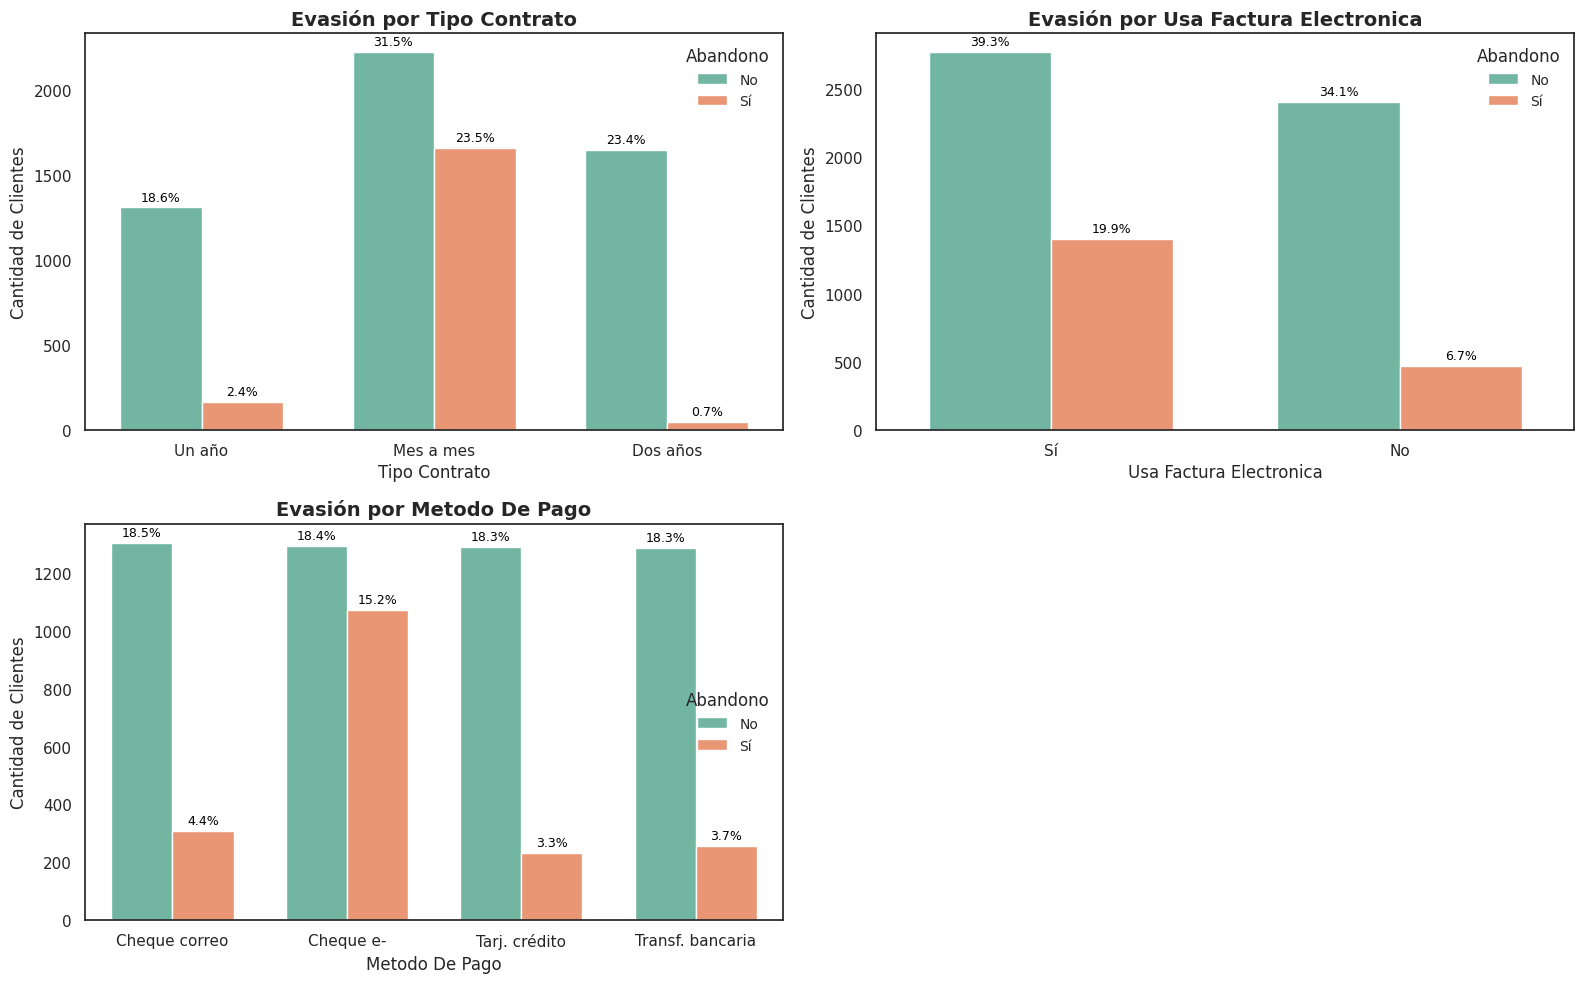

In [45]:
# --- USO DE LA FUNCIÓN para Factores de Compromiso del Cliente ---
generar_multiples_graficos(df_telecom, variables_a_graficar=factores_compromiso_cliente, nombre_archivo='factores_compromiso_cliente.png')

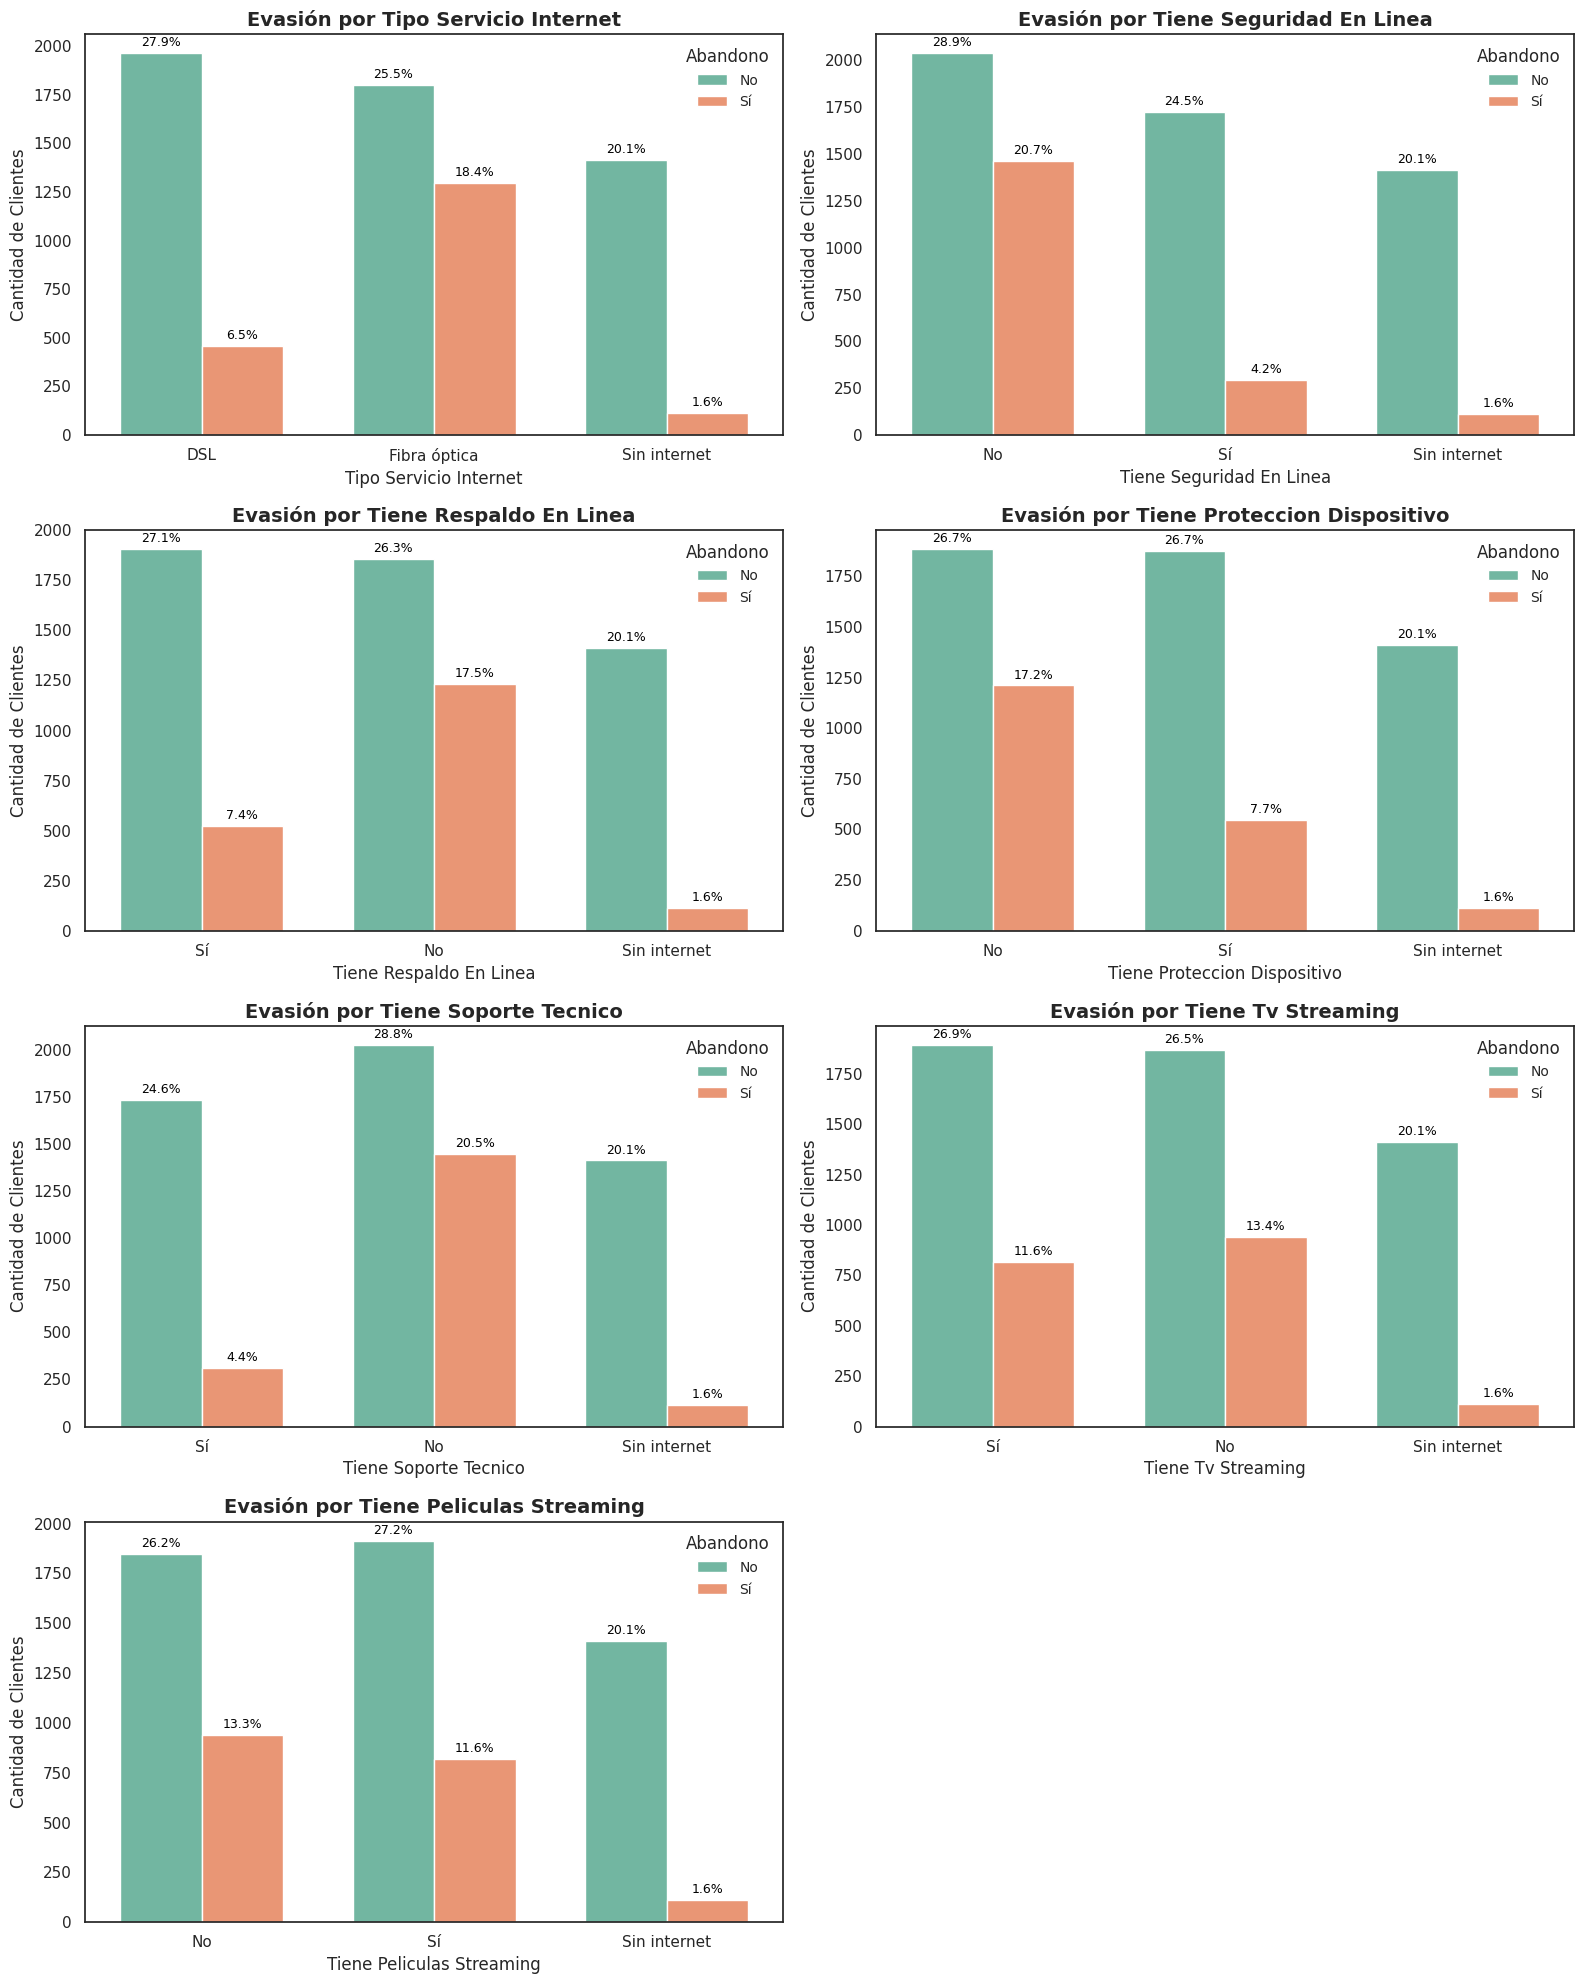

In [46]:
# --- USO DE LA FUNCIÓN para Factores de Servicio y Producto ---
generar_multiples_graficos(df_telecom, variables_a_graficar=factores_servicio_producto, nombre_archivo='factores_servicio_producto.png')

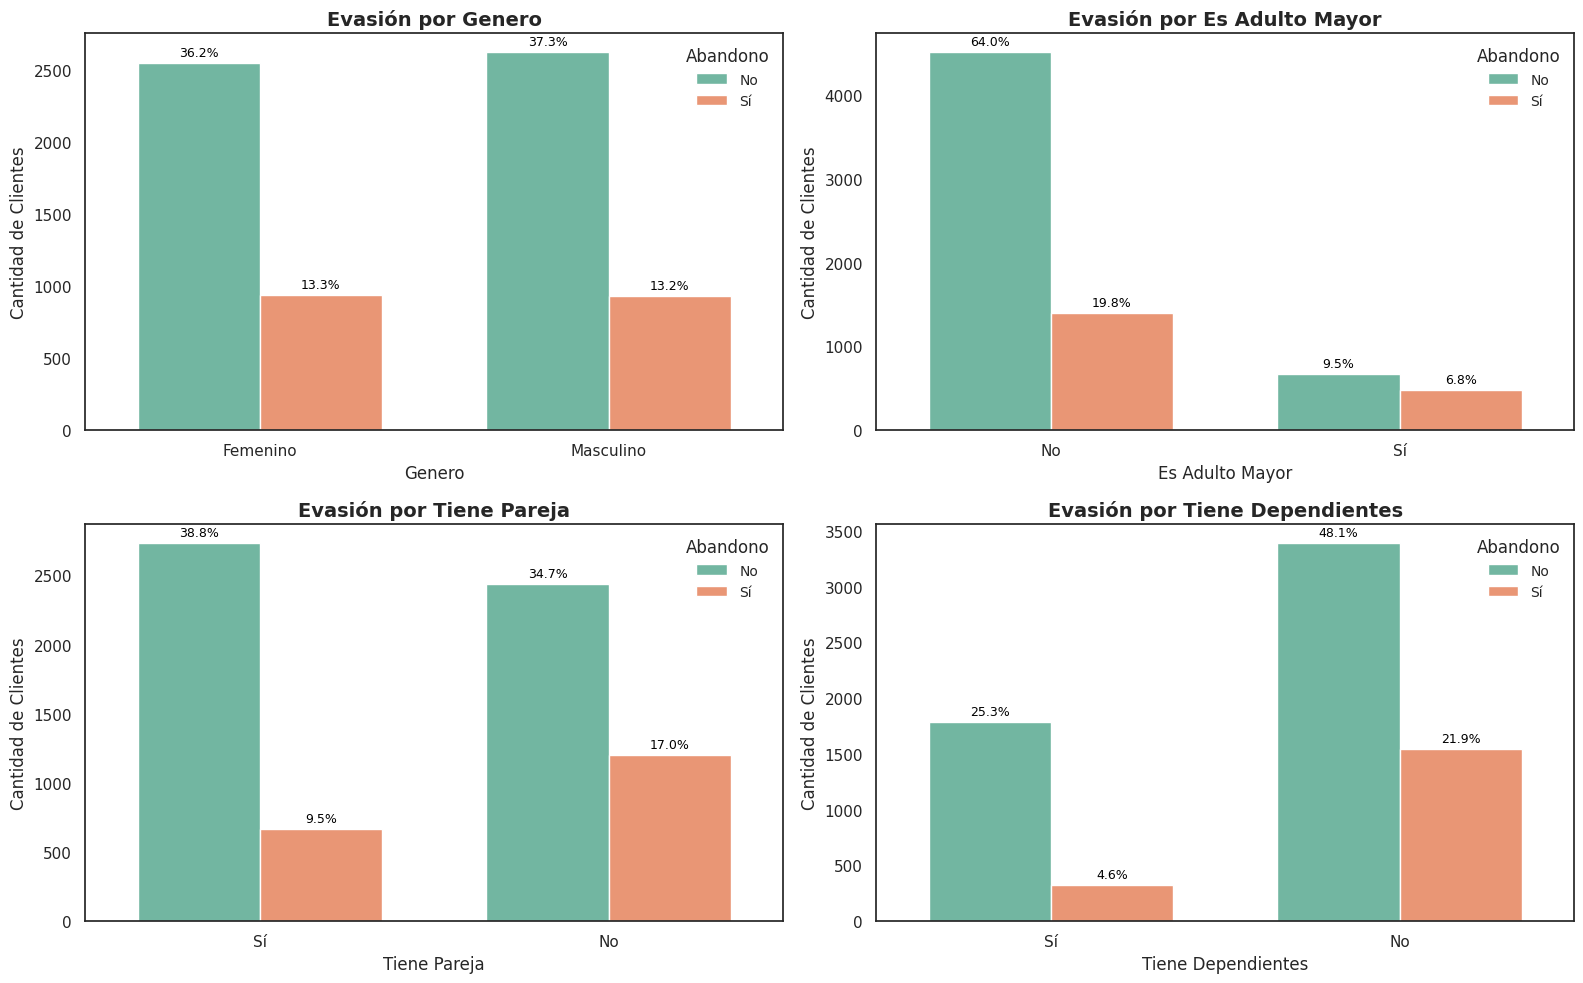

In [47]:
# --- USO DE LA FUNCIÓN para Factores Demográficos y de Estilo de Vida ---
generar_multiples_graficos(df_telecom, variables_a_graficar=factores_demograficos_estilo_vida, nombre_archivo='factores_demograficos_estilo_vida.png')

### **Conteo de evasión por variables numéricas**

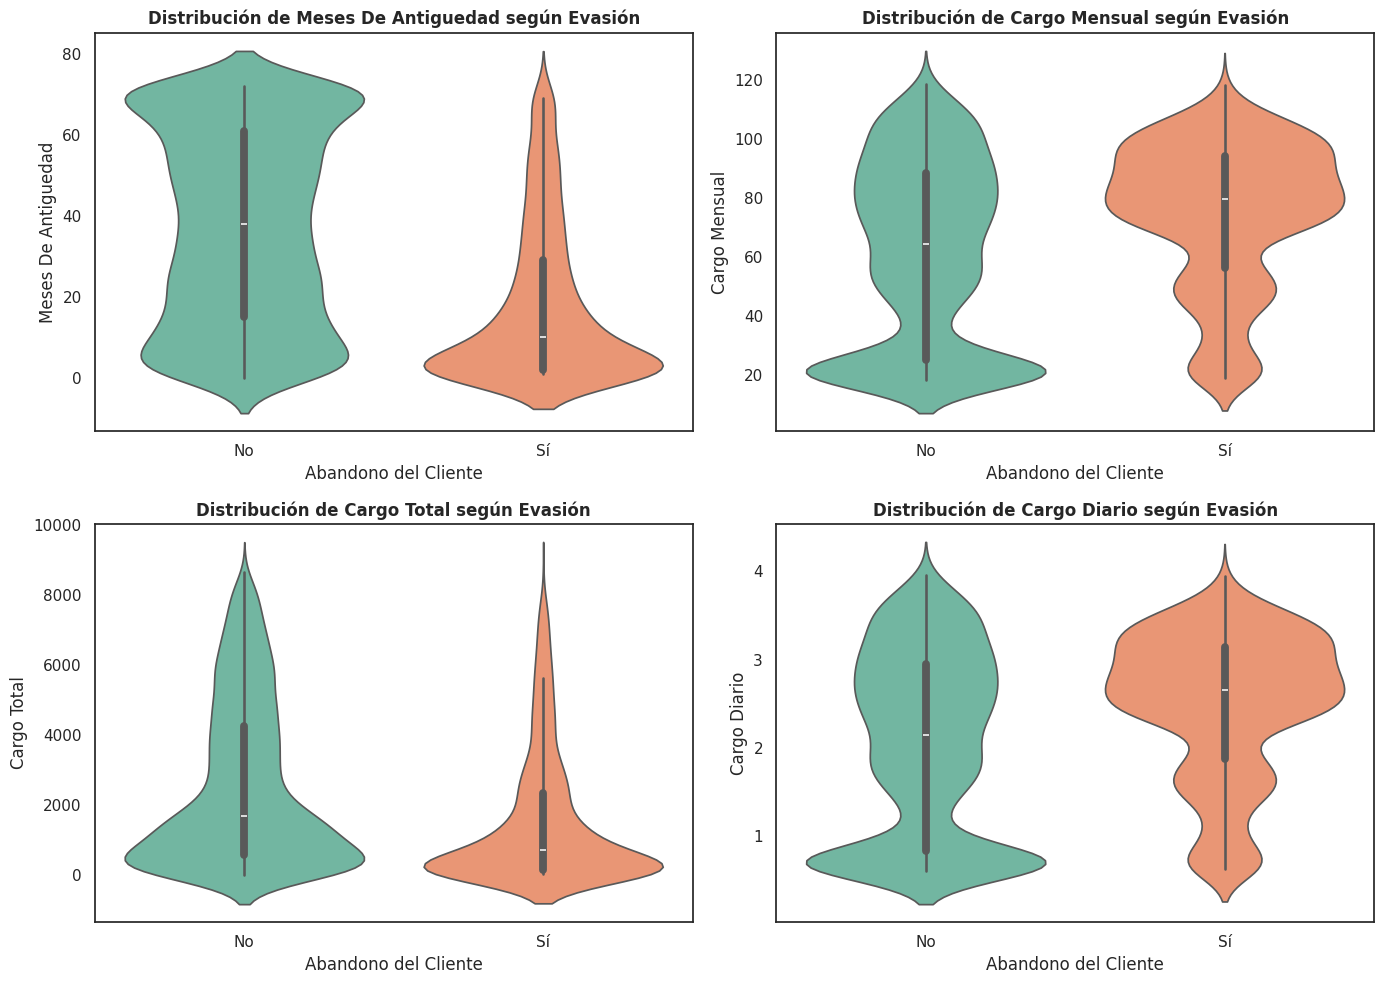

In [48]:
# Lista de variables numéricas relevantes (ajústala según tu dataset)
numericas = ['meses_de_antiguedad', 'cargo_mensual', 'cargo_total','cargo_diario']

# Configuración del gráfico
n = len(numericas)
n_cols = 2
n_rows = (n + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, var in enumerate(numericas):
    sns.violinplot(
        data=df_telecom,
        x='abandono_cliente',
        y=var,
        hue='abandono_cliente',
        palette='Set2',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'Distribución de {var.replace("_", " ").title()} según Evasión',fontweight='bold')
    axes[i].set_xlabel('Abandono del Cliente')
    axes[i].set_ylabel(var.replace("_", " ").title())

# Eliminar ejes vacíos si hay menos de 4 variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('evasion_variables_numericas.png', dpi=300)
plt.show()

## **¡EXTRA!**

  ### **Ver la correlación entre cargos (diario, mensual, total) y el abandono.**

**1: Codificación de la variable objetivo**

In [49]:
# Codificar 'abandono_cliente' como binaria para análisis de correlación
df_telecom['abandono_binario'] = df_telecom['abandono_cliente'].map({'No': 0, 'Sí': 1})

**2: Crear variable de cantidad de servicios contratados**

In [50]:
# Columnas que indican si un servicio está contratado (sin contar 'Sin internet')
columnas_servicios = [
    'tiene_lineas_multiples',
    'tiene_seguridad_en_linea',
    'tiene_respaldo_en_linea',
    'tiene_proteccion_dispositivo',
    'tiene_soporte_tecnico',
    'tiene_tv_streaming',
    'tiene_peliculas_streaming'
]

# Convertir a 1/0 (Sí=1, No=0, otros=0)
for col in columnas_servicios:
    df_telecom[col + '_bin'] = df_telecom[col].apply(lambda x: 1 if x == 'Sí' else 0)

# Sumar columnas binarias para obtener total de servicios contratados
df_telecom['total_servicios'] = df_telecom[[col + '_bin' for col in columnas_servicios]].sum(axis=1)


In [51]:
df_telecom.sample(10)

,id_cliente,abandono_cliente,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_de_antiguedad,tiene_servicio_telefonico,tiene_lineas_multiples,tipo_servicio_internet,...,cargo_diario,abandono_binario,tiene_lineas_multiples_bin,tiene_seguridad_en_linea_bin,tiene_respaldo_en_linea_bin,tiene_proteccion_dispositivo_bin,tiene_soporte_tecnico_bin,tiene_tv_streaming_bin,tiene_peliculas_streaming_bin,total_servicios
1192,1699-UOTXU,No,Masculino,No,No,No,60,Sí,No,DSL,...,2.046667,0,0,1,1,1,0,0,0,3
14,0019-GFNTW,No,Femenino,No,No,No,56,No,Sin servicio telefónico,DSL,...,1.501667,0,0,1,1,1,1,0,0,4
1278,1839-UMACK,No,Masculino,No,No,No,42,Sí,Sí,Sin internet,...,0.835000,0,1,0,0,0,0,0,0,1
5317,7255-SSFBC,No,Masculino,No,Sí,Sí,72,Sí,Sí,Fibra óptica,...,3.741667,0,1,0,1,1,1,1,1,6
3881,5311-IHLEI,No,Masculino,No,No,No,12,No,Sin servicio telefónico,DSL,...,1.698333,0,0,1,1,0,1,1,0,4
4160,5701-GUXDC,No,Femenino,No,Sí,No,26,No,Sin servicio telefónico,DSL,...,1.180000,0,0,1,0,1,0,0,0,2
5395,7375-WMVMT,No,Masculino,Sí,Sí,No,71,Sí,No,Fibra óptica,...,3.183333,0,0,0,1,1,1,0,1,4
1180,1685-VAYJF,No,Masculino,No,No,No,11,Sí,No,DSL,...,1.506667,0,0,0,0,0,0,0,0,0
622,0885-HMGPY,No,Masculino,No,No,No,62,Sí,Sí,DSL,...,2.313333,0,1,1,1,1,1,0,0,5
3167,4423-JWZJN,No,Masculino,No,Sí,Sí,64,Sí,Sí,Fibra óptica,...,3.008333,0,1,0,0,1,0,0,1,3


**3: Ver correlaciones**

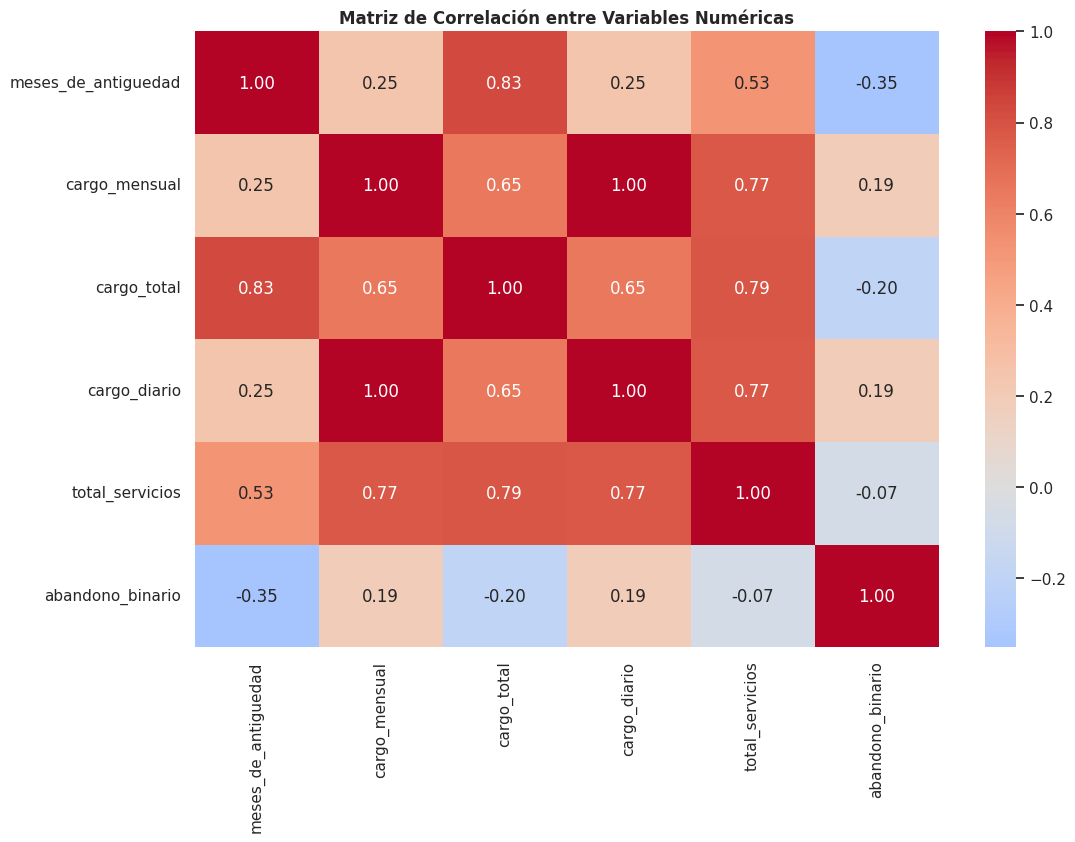

In [52]:
# Seleccionar solo columnas numéricas relevantes
columnas_correlacion = ['meses_de_antiguedad', 'cargo_mensual', 'cargo_total',
                        'cargo_diario', 'total_servicios', 'abandono_binario']

# Calcular matriz de correlación
correlaciones = df_telecom[columnas_correlacion].corr()

# Visualizar matriz
plt.figure(figsize=(12,8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Matriz de Correlación entre Variables Numéricas', fontweight='bold')

plt.savefig('matriz_de_correlacion_var_numericas.png', dpi=300, bbox_inches='tight')
plt.show()


**4: Gráficos de caja**

/tmp/ipython-input-1350036219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='abandono_cliente', y='cargo_diario', ax=axes[0], palette='Set2')
/tmp/ipython-input-1350036219.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='abandono_cliente', y='total_servicios', ax=axes[1], palette='Set3')


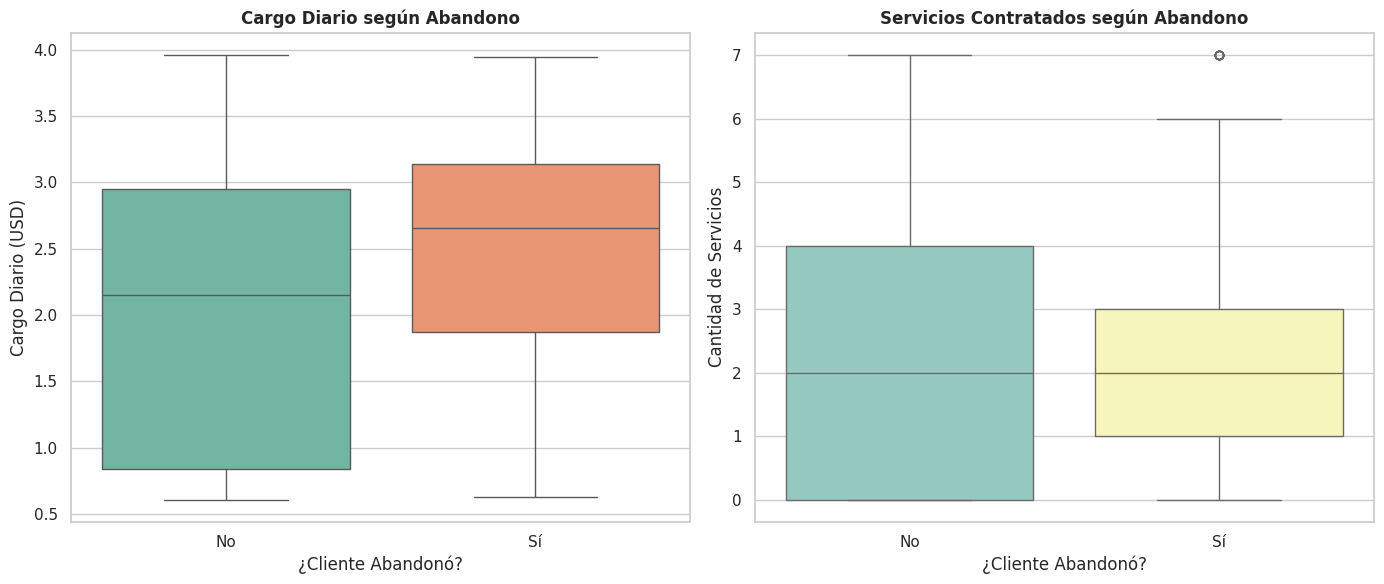

In [53]:
# Estilo general
sns.set(style="whitegrid")

# Crear figura con dos subgráficos (uno al lado del otro o uno debajo del otro)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Cambiar a (2, 1) si los prefieres uno debajo del otro

# Gráfico 1: Cargo diario vs abandono
sns.boxplot(data=df_telecom, x='abandono_cliente', y='cargo_diario', ax=axes[0], palette='Set2')
axes[0].set_title('Cargo Diario según Abandono', fontweight='bold')
axes[0].set_xlabel('¿Cliente Abandonó?')
axes[0].set_ylabel('Cargo Diario (USD)')

# Gráfico 2: Servicios contratados vs abandono
sns.boxplot(data=df_telecom, x='abandono_cliente', y='total_servicios', ax=axes[1], palette='Set3')
axes[1].set_title('Servicios Contratados según Abandono', fontweight='bold')
axes[1].set_xlabel('¿Cliente Abandonó?')
axes[1].set_ylabel('Cantidad de Servicios')

# Ajuste automático de espaciado para que no se solapen
plt.tight_layout()
plt.savefig('graficos_de_caja.png', dpi=300)
plt.show()

# **Informe de Análisis de Abandono de Clientes (Churn): Hallazgos y Estrategias**

<p align="center">
<img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/f6176c3574c81f6f9da65ef6456bebda034b8fea/imagenes/churn.png?raw=true" alt="distribucion_cargo_mensual.png"/>
<p>

## **Introducción**
En el dinámico sector de las telecomunicaciones, el abandono de clientes (churn) representa un desafío significativo que impacta directamente la rentabilidad y el crecimiento de las empresas. En Telecom X, comprender por qué los clientes se van es fundamental para desarrollar estrategias de retención efectivas.

El objetivo principal de este análisis es explorar y comprender los factores que influyen en el abandono de clientes en Telecom X. A través de la limpieza, el procesamiento y un exhaustivo análisis exploratorio de datos (EDA), buscamos identificar patrones, tendencias y correlaciones que nos permitan obtener insights valiosos sobre el comportamiento de los clientes que deciden irse. Estos hallazgos servirán como base para la toma de decisiones estratégicas y, potencialmente, para el desarrollo de modelos predictivos de churn más robustos en el futuro.

## **Limpieza y Tratamiento de Datos**
La calidad de los datos es la piedra angular de cualquier análisis significativo. Para garantizar la fiabilidad de nuestros hallazgos, se llevaron a cabo los siguientes pasos de limpieza y procesamiento de datos:

- **Carga de Datos:** Se importó el conjunto de datos de clientes, asegurando su correcta lectura en un DataFrame de Pandas.

- **Normalización de Columnas Anidadas:** Se identificaron y normalizaron las columnas que contenían datos anidados (customer, phone, internet, account). Este proceso transformó las estructuras complejas en columnas planas dentro del DataFrame, permitiendo un análisis más directo de la información contenida en estas secciones.

- **Renombre de Columnas y Estandarización de Nomenclatura:** Se tradujeron y renombraron las columnas del DataFrame del inglés al español para asegurar una nomenclatura clara, consistente y profesional a lo largo de todo el análisis e informe. Por ejemplo, customerID se convirtió en id_cliente y Churn en abandono_cliente.

- **Comprobación de Inconsistencias y Calidad de Datos:** Se realizó una verificación exhaustiva para asegurar la calidad de los datos. Esto incluyó la detección de valores duplicados en el conjunto de datos y la revisión de los valores únicos en cada columna para identificar posibles errores de formato o inconsistencias en los datos categóricos. Asimismo, se realizó una identificación inicial de valores faltantes en todo el conjunto de datos para comprender su distribución antes del tratamiento.

- **Manejo de Valores Faltantes:** Una vez identificados, se procedió al tratamiento específico de los valores faltantes.

  - La columna `abandono_cliente` (originalmente Churn) contenía cadenas vacías que se convirtieron a valores nulos (np.nan), y las filas correspondientes fueron eliminadas para asegurar la integridad de la variable objetivo.

  - La columna `cargo_total` inicialmente contenía valores en blanco o no numéricos. Estos se convirtieron al tipo numérico (`float`), y los valores resultantes de la coerción (donde no se pudo convertir a número) se imputaron con `0.0`, reflejando correctamente que los clientes con antigüedad 0 no habían acumulado cargos.

- **Conversión de Tipos de Datos:** Además de la limpieza de cargo_total, se aseguró que todas las columnas numéricas (`meses_de_antiguedad`, `cargo_mensual`, `cargo_total`, `cargo_diario`) tuvieran el tipo de dato numérico (`float` o `int`) apropiado para permitir operaciones matemáticas y análisis cuantitativos.

- **Estandarización de Valores Categóricos y Texto:** Se estandarizaron los valores dentro de las columnas categóricas para asegurar consistencia y facilitar el análisis.

  - Valores binarios como 'Yes'/'No' fueron traducidos a 'Sí'/'No' en columnas como `abandono_cliente`, `tiene_pareja`, `tiene_dependientes`, `tiene_servicio_telefonico`, y `usa_factura_electronica`.

  - La columna `es_adulto_mayor` se mapeó de sus valores numéricos (0, 1) a 'No' y 'Sí'.

  - Se realizaron traducciones específicas para las categorías de `genero` ('Female' a 'Femenino', 'Male' a 'Masculino'), `tiene_lineas_multiples` ('No phone service' a 'Sin servicio telefónico'), `tipo_servicio_internet` ('No' a 'Sin internet'), y los servicios adicionales (No internet service a 'Sin internet').

  - Los `tipo_contrato` y `metodo_de_pago` también fueron traducidos para una mejor comprensión en español.

- **Creación de Variables Derivadas:**

`cargo_diario`: Se calculó a partir de `cargo_mensual` dividiendo entre 30 (días promedio por mes), proporcionando una granularidad diaria del costo del servicio.

`total_servicios`: Se creó sumando el número de servicios activos que cada cliente tiene contratados. Se realizó un mapeo cuidadoso para asegurar que valores como 'no internet service', 'no phone service', 'no' (para servicios) y 'dsl'/'fiber optic' (para internet) se tradujeran correctamente a un conteo binario (0 o 1) de servicios activos para esta suma.

Estos pasos de preprocesamiento aseguran que el dataset esté listo para un análisis exploratorio robusto y para futuras etapas de modelado.

## **Análisis Exploratorio de Datos (EDA)**
El análisis exploratorio de datos nos permitió descubrir patrones y relaciones ocultas en el dataset. Se utilizaron diversas visualizaciones, incluyendo gráficos de barras, y diagramas de caja y bigotes (**Box Plots**), así como matrices de correlación.

### **Análisis Descriptivo de Variables Numéricas**
Se realizó un análisis descriptivo para las variables numéricas, proporcionando una visión general de su distribución y características clave.

<table><tbody><tr><th><p><br class="ProseMirror-trailingBreak"></p></th><th><p><strong>count</strong></p></th><th><p><strong>mean</strong></p></th><th><p><strong>std</strong></p></th><th><p><strong>min</strong></p></th><th><p><strong>25%</strong></p></th><th><p><strong>50%</strong></p></th><th><p><strong>75%</strong></p></th><th><p><strong>max</strong></p></th></tr><tr><td><p><strong>meses_de_antiguedad</strong></p></td><td><p>7043.0</p></td><td><p>32.37</p></td><td><p>24.56</p></td><td><p>0.00</p></td><td><p>9.00</p></td><td><p>29.00</p></td><td><p>55.00</p></td><td><p>72.00</p></td></tr><tr><td><p><strong>cargo_mensual</strong></p></td><td><p>7043.0</p></td><td><p>64.76</p></td><td><p>30.09</p></td><td><p>18.25</p></td><td><p>35.50</p></td><td><p>70.35</p></td><td><p>89.85</p></td><td><p>118.75</p></td></tr><tr><td><p><strong>cargo_total</strong></p></td><td><p>7043.0</p></td><td><p>2279.73</p></td><td><p>2266.79</p></td><td><p>0.00</p></td><td><p>398.55</p></td><td><p>1394.55</p></td><td><p>3786.60</p></td><td><p>8684.80</p></td></tr><tr><td><p><strong>cargo_diario</strong></p></td><td><p>7043.0</p></td><td><p>2.16</p></td><td><p>1.00</p></td><td><p>0.61</p></td><td><p>1.18</p></td><td><p>2.34</p></td><td><p>2.99</p></td><td><p>3.96</p></td></tr></tbody></table>


Los hallazgos más relevantes de este análisis son los siguientes:

- **Antigüedad (`meses_de_antiguedad`):** La antigüedad promedio de los clientes es de aproximadamente 32 meses. Sin embargo, la mediana (50%) es de 29 meses, lo que sugiere que la mitad de los clientes tienen menos de 29 meses de antigüedad. El rango intercuartílico (25% a 75%) muestra que el 50% central de los clientes ha estado con la empresa entre 9 y 55 meses.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/distribucion_meses_de_antiguedad.png?raw=true?raw=true" alt="Texto alternativo" width="75%"></center>

  El histograma de `meses_de_antiguedad` revela una distribución bimodal, con dos picos pronunciados. El primer pico se observa en los clientes de baja antigüedad (entre 0 y 5 meses), lo que indica un número considerable de clientes nuevos. El segundo pico se encuentra en los clientes de alta antigüedad (alrededor de 70-72 meses), sugiriendo una base de clientes leales y de larga duración. La frecuencia es menor en los rangos intermedios de antigüedad, lo que podría indicar que los clientes que superan los primeros meses tienden a permanecer por un período más prolongado.

- **Cargos Mensuales (`cargo_mensual`):** El cargo mensual promedio es de `$64.76`, con una mediana muy cercana de `$70.35`, lo que indica una distribución de precios relativamente simétrica. Existe una variación significativa, con un rango de precios que va desde `$18.25` hasta `$118.75`, lo que sugiere una amplia variedad de planes y servicios.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/distribucion_cargo_mensual.png?raw=true?raw=true" alt="Texto alternativo" width="75%"></center>

  El histograma de `cargo_mensual` muestra una distribución con múltiples picos. Se observa una concentración significativa de clientes en el rango de cargos mensuales bajos (alrededor de `$20`), lo que podría corresponder a planes básicos o clientes con pocos servicios. También se aprecian varios picos en el rango de cargos más altos (entre `$70` y `$100`), lo que sugiere la existencia de diferentes paquetes de servicios o combinaciones de servicios premium. La distribución general es amplia, reflejando la diversidad de la oferta de servicios de Telecom X.

- **Cargos Totales (`cargo_total`):** Este es el hallazgo más destacado. El cargo total promedio (`$2,279.73`) es mucho mayor que la mediana (`$1,394.55`). Esta gran diferencia indica una distribución fuertemente asimétrica (sesgada a la derecha). Esto significa que la mayoría de los clientes tienen cargos totales bajos, pero un pequeño número de clientes con contratos muy largos y/o planes caros infla significativamente el promedio. La alta desviación estándar (`$2,266.79`) confirma la enorme dispersión de este valor.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/distribucion_cargo_total.png?raw=true?raw=true" alt="Texto alternativo" width="75%"></center>

  El histograma de `cargo_total` presenta una distribución altamente asimétrica con un sesgo pronunciado hacia la derecha. La mayor concentración de clientes se encuentra en el rango de cargos totales bajos (cercanos a `$0`). Esto es consistente con la alta proporción de clientes nuevos o de baja antigüedad, quienes aún no han acumulado grandes cargos. A medida que los cargos totales aumentan, la frecuencia disminuye drásticamente, lo que indica que hay un menor número de clientes con cargos totales muy elevados, correspondientes a aquellos con mayor antigüedad y/o planes de alto costo.

- **Cargo Diario (`cargo_diario`):** Como variable derivada del cargo mensual, presenta una distribución similar. El cargo diario promedio es de `$2.16`, lo que ayuda a contextualizar el costo del servicio en una escala más pequeña.

### **Análisis Descriptivo de Variables Categóricas**
Se realizó un análisis descriptivo de las variables categóricas para entender la composición demográfica y de servicios de la base de clientes de Telecom X.

<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/tabla_descriptivo_categoricas.png?raw=true" alt="Texto alternativo" width="100%"></center>

- **Abandono de Clientes (`abandono_cliente`):** La tasa de abandono general es del 26.54% (`Sí`), lo que significa que aproximadamente uno de cada cuatro clientes ha abandonado la empresa. Esta cifra subraya la seriedad del problema de retención que enfrenta la empresa. El 73.46% de los clientes se han mantenido (`No`).

<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/f6176c3574c81f6f9da65ef6456bebda034b8fea/imagenes/porcentaje_clientes_abandonaron.png?raw=true" alt="Texto alternativo" width="65%"></center>

- **Género (`genero`):** La distribución es casi perfectamente equitativa, con un 50.48% de clientes masculinos y 49.52% de clientes femeninos. Esto sugiere que el género por sí solo no es un factor determinante en el abandono de clientes.

- **Características Demográficas:**

  - `es_adulto_mayor`: Un 16.21% de los clientes son adultos mayores.

  - `tiene_pareja`: La distribución es casi uniforme, con un 51.7% de clientes sin pareja y un 48.3% con pareja.

  - `tiene_dependientes`: La gran mayoría de los clientes (70.04%) no tienen dependientes.

- **Servicios Principales:**

  - `tiene_servicio_telefonico`: La gran mayoría de los clientes (90.32%) tiene servicio telefónico, lo que lo convierte en un servicio casi universal entre la base de clientes.

  - `tiene_lineas_multiples`: La base de clientes está dividida, con un 48.13% que no tiene líneas múltiples y un 42.18% que sí las tiene. Un 9.68% de los clientes no tiene servicio telefónico, lo que corresponde a los que no tienen este servicio.

  - `tipo_servicio_internet`: El servicio de Fibra óptica es el más popular (43.96%), seguido por el servicio DSL (34.37%). Un 21.67% de los clientes no tiene servicio de internet.

- **Servicios Adicionales:**

  Para la mayoría de los servicios adicionales como `tiene_seguridad_en_linea`, `tiene_respaldo_en_linea`, `tiene_proteccion_dispositivo`, `tiene_soporte_tecnico`, `tiene_tv_streaming` y `tiene_peliculas_streaming`, la proporción de clientes que no los tiene (No) es superior al 40%. Esto sugiere que estos servicios son opciones adicionales que no son ampliamente adoptadas por la mayoría de los clientes.

- **Contratos y Pagos:**

  - `tipo_contrato`: Más de la mitad de los clientes (55.02%) tiene un contrato **Mes a mes**. Este es un hallazgo crítico, ya que este tipo de contrato es conocido por su alta flexibilidad, lo que podría estar directamente relacionado con el abandono.

  - `usa_factura_electronica`: Una mayoría significativa (59.22%) de los clientes utiliza la factura electrónica.

  - `metodo_de_pago`: El **Cheque electrónico** es el método de pago más utilizado (33.58%). Esto es un punto importante a considerar, dado que investigaciones previas a menudo asocian este método de pago con tasas de abandono más altas.


### **Análisis Detallado de Abandono por Variables Categóricas**
A continuación, se presentan los hallazgos clave de los gráficos de barras que analizan la tasa de abandono para cada variable categórica.

#### **Factores de Compromiso del Cliente**

- **Tipo de Contrato:** El gráfico de barras muestra claramente que el tipo de contrato es el predictor más fuerte de abandono. Los clientes con contratos **"Mes a mes"** tienen una tasa de abandono drásticamente más alta (aproximadamente 42%) en comparación con los que tienen contratos a **"Un año"** (menos del 12%) o **"Dos años"** (casi insignificante). La falta de un compromiso a largo plazo es un factor de riesgo crítico.

- **Método de Pago:** Existe una clara diferencia en la tasa de abandono por método de pago. Los clientes que pagan con **"Cheque electrónico"** muestran la tasa de abandono más alta (alrededor del 45%). Por el contrario, los clientes con métodos de pago automáticos, como **"Transferencia bancaria"** o **"Tarjeta de crédito"**, tienen tasas de abandono considerablemente más bajas.

- **Factura Electrónica (`usa_factura_electronica`):** Los clientes que usan la factura electrónica tienen una tasa de abandono ligeramente más alta que los que no, aunque este factor es menos determinante que el tipo de contrato o el método de pago.

<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/factores_compromiso_cliente.png?raw=true?raw=true" alt="Texto alternativo" width="100%"></center>

#### **Factores de Servicio y Producto**

- **Tipo de Servicio de Internet:** Los clientes con **"Fibra óptica"** son los más propensos a abandonar la compañía. Esto es un hallazgo importante que podría sugerir problemas de calidad o una fuerte competencia en este segmento de servicios. Los clientes con **"DSL"** o sin servicio de internet son mucho más estables.

- **Servicios Adicionales:** Para cada uno de los servicios adicionales (`tiene_seguridad_en_linea`, `tiene_respaldo_en_linea`, `tiene_proteccion_dispositivo`, `tiene_soporte_tecnico`, `tiene_tv_streaming` y `tiene_peliculas_streaming`), los clientes que no tienen el servicio tienen consistentemente una tasa de abandono más alta que los que sí lo tienen. Esto refuerza la idea de que ofrecer una gama de servicios de valor agregado contribuye significativamente a la retención.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/factores_servicio_producto.png?raw=true?raw=true?raw=true" alt="Texto alternativo" width="100%"></center>

#### **Factores Demográficos y de Estilo de Vida**
- **Género (`genero`):** El gráfico confirma que el género no tiene una influencia significativa en la tasa de abandono. La proporción de abandono es casi idéntica para hombres y mujeres.

- `es_adulto_mayor`: Los adultos mayores muestran una tasa de abandono ligeramente más alta que los clientes más jóvenes.

- `tiene_pareja` y `tiene_dependientes`: Los clientes que no tienen pareja o dependientes tienen una tasa de abandono más alta. Esto sugiere que las estructuras familiares con mayor dependencia de los servicios son un factor de retención.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/factores_demograficos_estilo_vida.png?raw=trueg?raw=true?raw=true?raw=true" alt="Texto alternativo" width="100%"></center>

### **Análisis por Variables Numéricas**
Los gráficos de violín a continuación ilustran la distribución de las variables numéricas y ofrecen una visión más profunda de cómo estas se relacionan con la evasión de clientes.
<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/evasion_variables_numericas.png?raw=true?raw=true?raw=true" alt="Texto alternativo" width="100%"></center>

- **Antigüedad (`meses_de_antiguedad`):** El gráfico de violín para la antigüedad muestra una diferencia dramática en la distribución. La densidad de clientes que abandonaron (Sí) está fuertemente concentrada en la parte inferior del gráfico, indicando que la mayoría de los clientes que se van tienen una baja antigüedad. En contraste, la distribución para los clientes que se quedan (No) es mucho más uniforme y se extiende a lo largo de todo el espectro de meses, confirmando que la antigüedad es un factor de retención crucial.

- **Cargos Mensuales y Diarios (`cargo_mensual` y `cargo_diario`):** Ambos gráficos de violín (`cargo_mensual` y `cargo_diario`) muestran una clara tendencia: la distribución de los clientes que abandonan (Sí) se desplaza hacia valores más altos en comparación con los clientes que se quedan (No). Esto indica que los clientes con cargos mensuales y diarios más elevados son considerablemente más propensos a abandonar el servicio, lo que sugiere una alta sensibilidad al precio, especialmente en los paquetes más caros.

- **Cargos Totales (`cargo_total`):** El gráfico de violín para los cargos totales refuerza los hallazgos de la antigüedad. La distribución de los clientes que abandonan está concentrada en valores bajos. Esto es lógico, ya que los clientes con poca antigüedad no han tenido la oportunidad de acumular grandes cargos totales. Por el contrario, la distribución de los clientes retenidos muestra una cola larga hacia valores altos, representando a los clientes leales que han estado con la empresa por un largo período.

### **Análisis de Correlación**
El análisis de correlación nos permite cuantificar la relación lineal entre las variables.

<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/matriz_de_correlacion_var_numericas.png?raw=true" alt="Texto alternativo" width="75%"></center>

El mapa de calor de la matriz de correlación muestra la relación de cada variable numérica con el abandono del cliente (representado como abandono_binario). La tabla a continuación resume los hallazgos más importantes:

<table border="1" cellspacing="0" cellpadding="6" style="border-collapse: collapse; text-align: center; width: 100%;">
  <thead style="background-color: #f2f2f2;">
    <tr>
      <th>Correlación</th>
      <th>Valor</th>
      <th>Observación</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Antiguedad vs. Abandono del Cliente</td>
      <td>-0.35</td>
      <td style="text-align: left;">Correlación negativa moderada. Confirma que a mayor antigüedad, menor probabilidad de abandono.</td>
    </tr>
    <tr>
      <td>Cargo Mensual vs. Abandono del Cliente</td>
      <td>0.19</td>
      <td style="text-align: left;">Correlación positiva débil. A mayor cargo mensual, una ligera tendencia a mayor abandono.</td>
    </tr>
    <tr>
      <td>Cargo Total vs. Abandono del Cliente</td>
      <td>-0.20</td>
      <td style="text-align: left;">Correlación negativa débil. A mayores cargos totales acumulados, menor abandono.</td>
    </tr>
    <tr>
      <td>Total Servicios vs. Abandono del Cliente</td>
      <td>-0.07</td>
      <td style="text-align: left;">Correlación negativa muy débil. Los clientes con más servicios son levemente menos propensos a abandonar.</td>
    </tr>
  </tbody>
</table>

Además de la matriz de correlación, los gráficos de caja nos ofrecen una perspectiva visual de estas relaciones, confirmando las tendencias observadas.

<center><img src="https://github.com/herbertturpo/challenge-telecomx-latam/blob/main/imagenes/graficos_de_caja.png?raw=true" alt="Texto alternativo" width="85%"></center>

- **Cargo Diario vs. Abandono:** El diagrama de caja para el cargo diario muestra claramente que la mediana (la línea central de la caja) y el rango intercuartílico de los cargos son notablemente más altos para los clientes que abandonaron (Sí) en comparación con los que se quedaron (No). Esto visualiza la correlación positiva débil, indicando que los clientes que pagan más por día son más propensos a irse.

- **Total de Servicios vs. Abandono:** El segundo diagrama de caja para el total de servicios contratados muestra que los clientes que se quedaron (No) tienden a tener más servicios contratados, con una mediana y un rango intercuartílico más altos que los clientes que abandonaron (Sí). Este gráfico refuerza la idea de que los servicios adicionales son un factor de retención importante.

## **Conclusiones e Insights**
Nuestro análisis exploratorio de datos ha revelado varios *insights* cruciales sobre el abandono de clientes en Telecom X:

- El **"Período de Gracia" de la Antigüedad:** Los clientes más nuevos son los más vulnerables al abandono.

- El **Compromiso es Clave**: Los contratos a largo plazo y los pagos automáticos son fuertes indicadores de lealtad.

- **El Valor de los Servicios Adicionales:** Cuantos más servicios un cliente tiene contratados, menos probable es que abandone.

- **Sensibilidad al Precio:** Los cargos mensuales más altos (especialmente en el caso de la fibra óptica) están asociados con un mayor abandono.

- **Factores Demográficos y de Comportamiento:** La falta de un socio o dependientes, y ser ciudadano mayor, pueden influir marginalmente en el abandono. La facturación electrónica también se correlaciona con un mayor abandono.

Estos datos pueden ayudar a reducir el abandono al permitirnos identificar a los clientes de alto riesgo y entender los motivos subyacentes de su decisión de irse.

## **Recomendaciones**
Basado en los hallazgos de este análisis exploratorio, se proponen las siguientes recomendaciones estratégicas para mitigar el abandono de clientes:

- **Programas de Inducción y Retención Temprana:**

  - Foco en Nuevos Clientes: Implementar programas de bienvenida proactivos y seguimiento intensivo durante los primeros 6-12 meses de servicio.

  - **Monitoreo Temprano:** Identificar y contactar a clientes con baja antigüedad y altos cargos mensuales.

- **Fomentar Contratos a Largo Plazo y Pagos Automatizados:**

  - Incentivos para Contratos: Ofrecer descuentos atractivos o beneficios adicionales por la firma de contratos de 1 o 2 años.

  - Promoción de Pagos Automáticos: Incentivar la domiciliación de pagos, ya que los clientes con estos métodos muestran mayor retención.

- **Estrategias de "Bundling" y Venta Cruzada:**

  - Promover Paquetes de Servicios: Diseñar y publicitar agresivamente paquetes de servicios para aumentar el total_servicios por cliente.

  - Campañas de Valor Agregado: Educar a los clientes sobre los beneficios de los servicios adicionales.

- **Análisis Competitivo de Precios y Valor:**

  - Segmentación por Costo: Realizar un análisis más profundo en el segmento de clientes con altos cargos mensuales.

  - Ofertas Dirigidas: Crear ofertas de retención personalizadas para clientes de alto valor/alto riesgo.

- **Optimización del Proceso de Facturación:**

  - Claridad en Facturas Electrónicas: Asegurarse de que las facturas electrónicas sean claras y detalladas.

El siguiente paso sería la implementación de modelos predictivos y la evaluación continua de la efectividad de estas estrategias.